# **Lab 3b. Decision Tree Classifier**
## **Data preparation**
To run the lab exercises for the decision trees, we are going to create a synthetic dataset comprising forest and non-forest classes. We will normalize the dataset (range [0, 1]) and split into training and testing set.

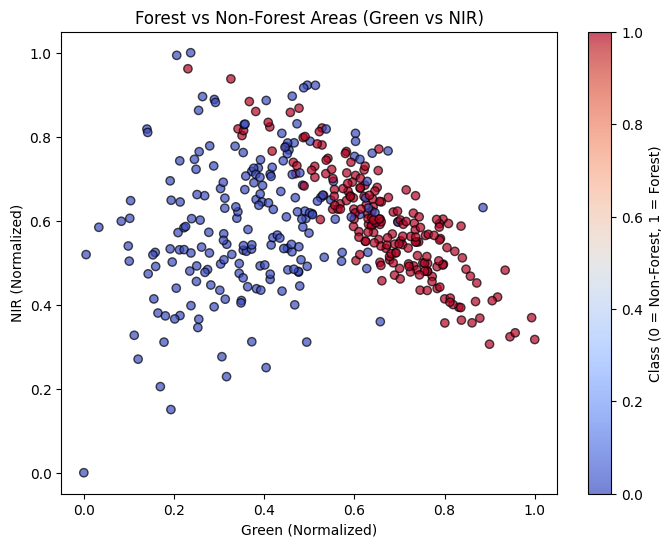

      Green       Red       NIR  Class
0  0.528320  0.469761  0.780341      1
1  0.254992  0.561103  0.365518      0
2  0.191501  0.730518  0.695006      0
3  0.678188  0.949385  0.506753      1
4  0.831578  0.634287  0.394177      1


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=400, n_features=3, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=42)

# Convert into a DataFrame
data = pd.DataFrame(X, columns=['Green', 'Red', 'NIR'])
data['Class'] = y

# Normalize the features (Green, Red, NIR)
scaler = MinMaxScaler()
data[['Green', 'Red', 'NIR']] = scaler.fit_transform(data[['Green', 'Red', 'NIR']])

# Split into training and test sets
X = data[['Green', 'Red', 'NIR']].values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset in 2D (Green vs NIR)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Green (Normalized)')
plt.ylabel('NIR (Normalized)')
plt.title('Forest vs Non-Forest Areas (Green vs NIR)')
plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')
plt.show()

# Display the first few rows of the DataFrame
print(data.head())

## **Function for decision boundaries**
Next, we are going to define a function to plot the decision boundary.

In [ ]:
# Define function
def plot_decision_boundary(model, X, y, title):
    """
    Plots the decision boundary for a 2D dataset.
    """
    # Remove plt.figure(...) and plt.show() calls here
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot into the *current* axes
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Green")
    plt.ylabel("NIR")
    plt.title(title)
    plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')

# **Decision Tree (GINI)**
## **Procedure**
First, We will initialize and train a decision tree classifier.

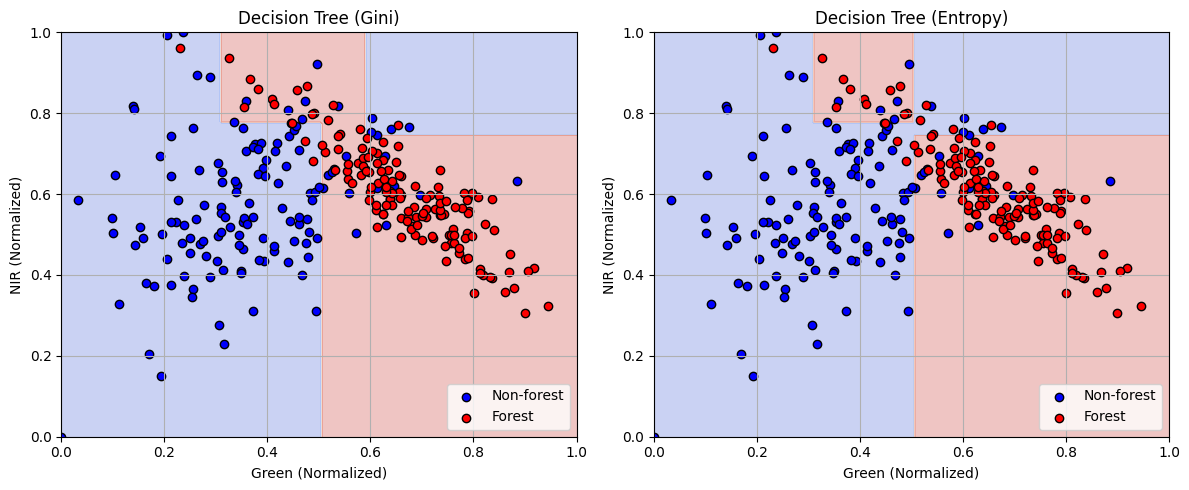

Gini Tree Accuracy   : 85.00%
Entropy Tree Accuracy: 83.33%


In [ ]:
# Import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1) Train two Decision Trees with different criteria
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

tree_gini.fit(X_train, y_train)
tree_entropy.fit(X_train, y_train)

# 2) We'll fix 'Red' dimension at its median from X_train to visualize the boundary in 2D
fixed_red = np.median(X_train[:, 1])  # 1 => the 'Red' column

def plot_tree_boundary_2D(clf, title, subplot_index):
    """
    Plot the 2D decision boundary (Green vs. NIR) by fixing Red dimension.
    """
    steps = 200
    green_vals = np.linspace(0, 1, steps)
    nir_vals   = np.linspace(0, 1, steps)
    g_grid, n_grid = np.meshgrid(green_vals, nir_vals)

    # Flatten for prediction
    g_flat = g_grid.ravel()
    n_flat = n_grid.ravel()

    # Rebuild the 3D array but Red is fixed
    X_2D = np.column_stack([g_flat,
                            np.full_like(g_flat, fixed_red),
                            n_flat])

    # Predict
    y_pred = clf.predict(X_2D).reshape(g_grid.shape)

    # Plot
    plt.subplot(1, 2, subplot_index)
    plt.contourf(g_grid, n_grid, y_pred, alpha=0.3, cmap=plt.cm.coolwarm)

    # Overlay training points for clarity (Green vs. NIR)
    plt.scatter(
        X_train[y_train==0, 0], X_train[y_train==0, 2],
        c='blue',  edgecolors='k', label='Non-forest'
    )
    plt.scatter(
        X_train[y_train==1, 0], X_train[y_train==1, 2],
        c='red',   edgecolors='k', label='Forest'
    )

    plt.title(title)
    plt.xlabel("Green (Normalized)")
    plt.ylabel("NIR (Normalized)")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend(loc="lower right")
    plt.grid(True)

# 3) Plot side by side
plt.figure(figsize=(12, 5))

plot_tree_boundary_2D(tree_gini,    "Decision Tree (Gini)",    1)
plot_tree_boundary_2D(tree_entropy, "Decision Tree (Entropy)", 2)

plt.tight_layout()
plt.show()

# 4) Evaluate the accuracy (optional)
acc_gini    = tree_gini.score(X_test, y_test)
acc_entropy = tree_entropy.score(X_test, y_test)
print(f"Gini Tree Accuracy   : {acc_gini*100:.2f}%")
print(f"Entropy Tree Accuracy: {acc_entropy*100:.2f}%")

Finally, we plot the decision trees (Gini and Entropy).

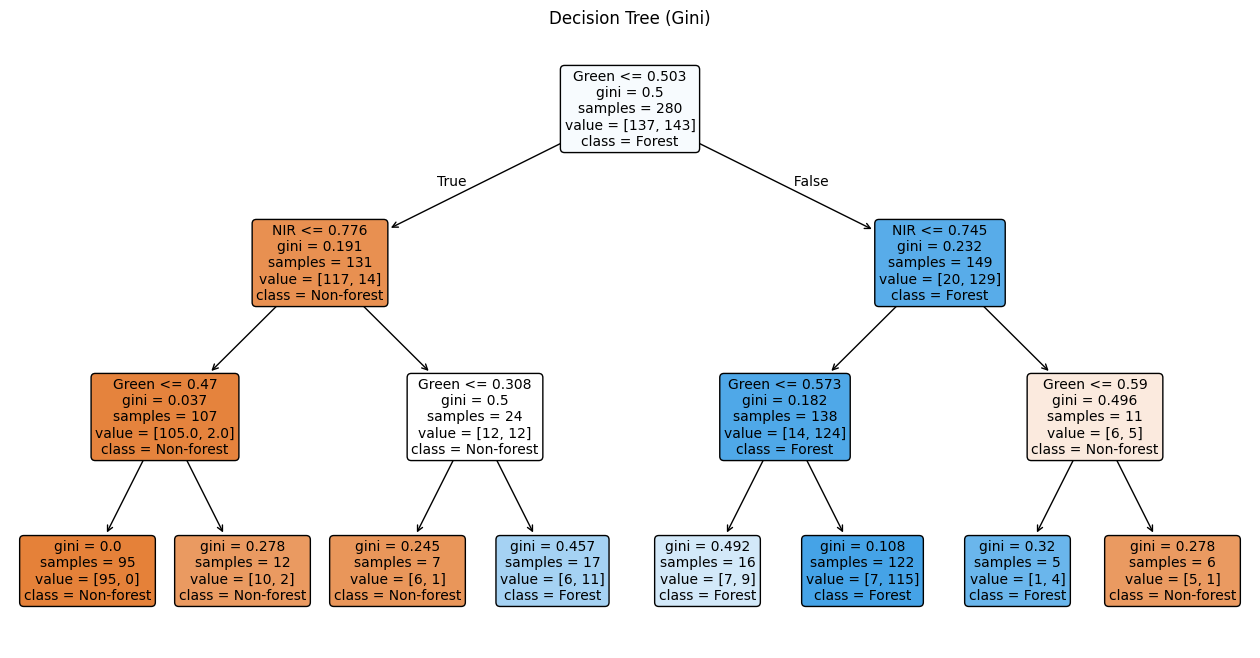

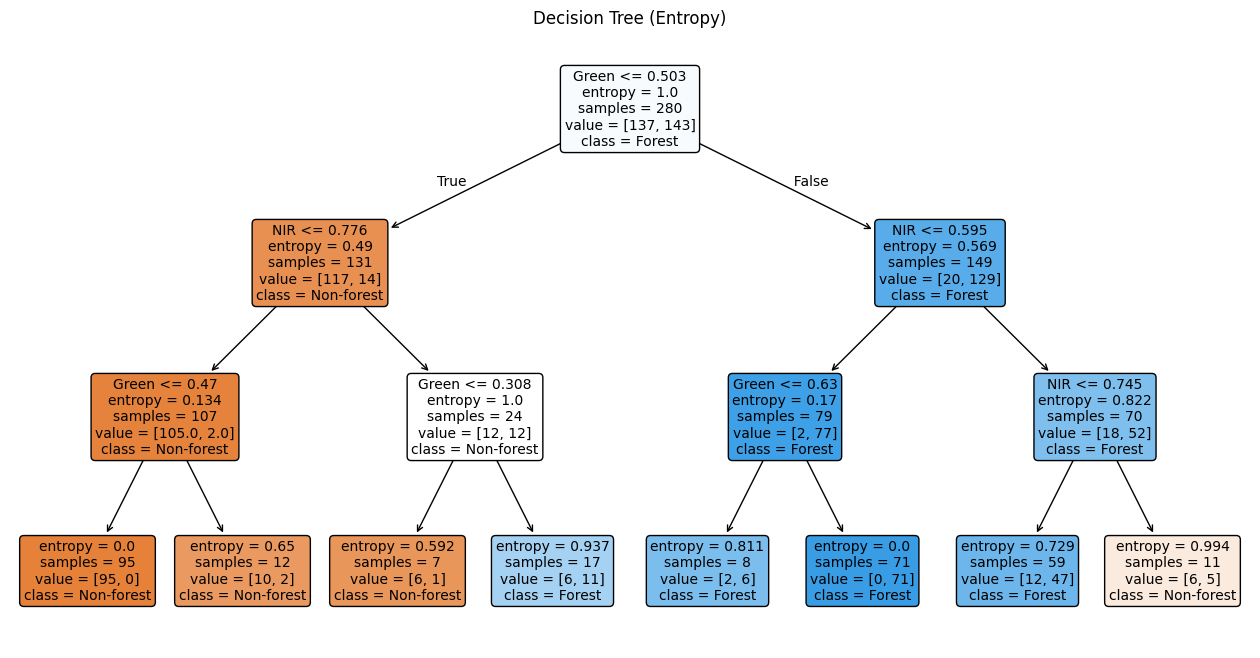

Gini Tree Accuracy   : 85.00%
Entropy Tree Accuracy: 83.33%


In [ ]:
# Plot the Gini Tree
plt.figure(figsize=(16, 8))
plot_tree(
    tree_gini,
    feature_names=["Green", "Red", "NIR"],
    class_names=["Non-forest", "Forest"],
    filled=True,                 # color the nodes by class
    rounded=True,                # rounded corners for nicer aesthetics
    proportion=False,            # show sample counts as absolute numbers
    fontsize=10
)
plt.title("Decision Tree (Gini)")
plt.show()

# 3) Plot the Entropy Tree
plt.figure(figsize=(16, 8))
plot_tree(
    tree_entropy,
    feature_names=["Green", "Red", "NIR"],
    class_names=["Non-forest", "Forest"],
    filled=True,
    rounded=True,
    proportion=False,
    fontsize=10
)
plt.title("Decision Tree (Entropy)")
plt.show()

# 4) (Optional) Check accuracy
acc_gini    = tree_gini.score(X_test, y_test)
acc_entropy = tree_entropy.score(X_test, y_test)
print(f"Gini Tree Accuracy   : {acc_gini*100:.2f}%")
print(f"Entropy Tree Accuracy: {acc_entropy*100:.2f}%")